## Decision Tree Classification - eReader Adoption Prediction

In [42]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
tr = pd.read_csv("C:\\Users\\mrc16\\Downloads\\Chapter10DataSet_Training (1).csv")


In [46]:
sc= pd.read_csv ("C:\\Users\\mrc16\\Downloads\\Chapter10DataSet_Scoring.csv")

In [48]:
# Check structure
print(tr.info())
print(sc.info())

# Preview data
tr.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   User_ID                    661 non-null    int64 
 1   Gender                     661 non-null    object
 2   Age                        661 non-null    int64 
 3   Marital_Status             661 non-null    object
 4   Website_Activity           661 non-null    object
 5   Browsed_Electronics_12Mo   661 non-null    object
 6   Bought_Electronics_12Mo    661 non-null    object
 7   Bought_Digital_Media_18Mo  661 non-null    object
 8   Bought_Digital_Books       661 non-null    object
 9   Payment_Method             661 non-null    object
 10  Tablet_Adoption            661 non-null    object
dtypes: int64(2), object(9)
memory usage: 56.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 10 columns):
 #   Column        

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method,Tablet_Adoption
0,9552,M,61,M,Seldom,Yes,Yes,Yes,No,Bank Transfer,Late Majority
1,6757,M,27,M,Regular,Yes,No,Yes,No,Bank Transfer,Innovator
2,3599,F,29,M,Seldom,Yes,Yes,Yes,Yes,Bank Transfer,Early Adopter
3,6811,M,49,M,Seldom,Yes,Yes,Yes,Yes,Website Account,Early Adopter
4,4104,M,29,S,Seldom,Yes,Yes,Yes,No,Website Account,Late Majority


In [50]:
# Check missing in training
print("Training Missing Values:")
print(tr.isnull().sum())

# Check missing in test
print("\nTest Missing Values:")
print(sc.isnull().sum())

Training Missing Values:
User_ID                      0
Gender                       0
Age                          0
Marital_Status               0
Website_Activity             0
Browsed_Electronics_12Mo     0
Bought_Electronics_12Mo      0
Bought_Digital_Media_18Mo    0
Bought_Digital_Books         0
Payment_Method               0
Tablet_Adoption              0
dtype: int64

Test Missing Values:
User_ID                      0
Gender                       0
Age                          0
Marital_Status               0
Website_Activity             0
Browsed_Electronics_12Mo     0
Bought_Electronics_12Mo      0
Bought_Digital_Media_18Mo    0
Bought_Digital_Books         0
Payment_Method               0
dtype: int64


In [52]:
# Check class distribution in training data
tr['Tablet_Adoption'].value_counts(normalize=True)


Tablet_Adoption
Early Adopter     0.310136
Early Majority    0.281392
Late Majority     0.260212
Innovator         0.148260
Name: proportion, dtype: float64

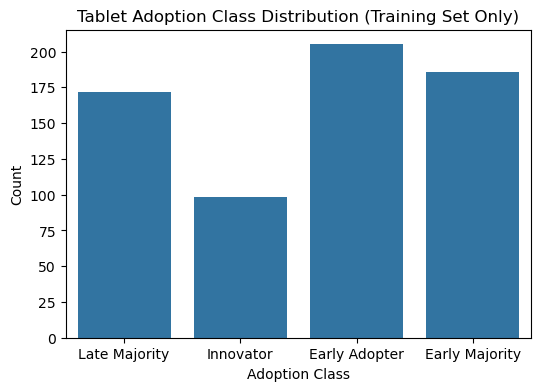

In [54]:
plt.figure(figsize=(6,4))
sns.countplot(x='Tablet_Adoption', data=tr)
plt.title("Tablet Adoption Class Distribution (Training Set Only)")
plt.xlabel("Adoption Class")
plt.ylabel("Count")
plt.show()


In [ ]:
#covert categorical variables to factors
categorical_cols = ['Gender', 'Age', 'Income','Website_Activity', 'Browsed_Electronics_12Mo', 'Bought_Electronics_12Mo',  'Bought_Digital_Media_18Mo',   'Tablet_Adoption']  # modify as needed

## Data Exploration Training Set 

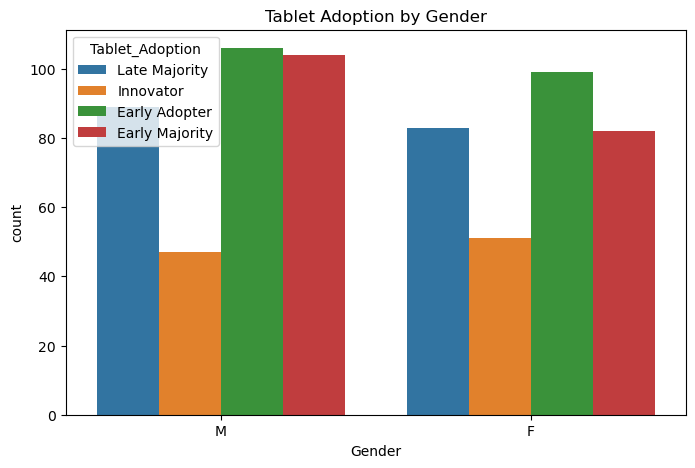

In [57]:
#Visualization :Gender vs Tablet Adoption
plt.figure(figsize=(8, 5))
sns.countplot(data=tr, x="Gender", hue="Tablet_Adoption")
plt.title("Tablet Adoption by Gender")
plt.show()

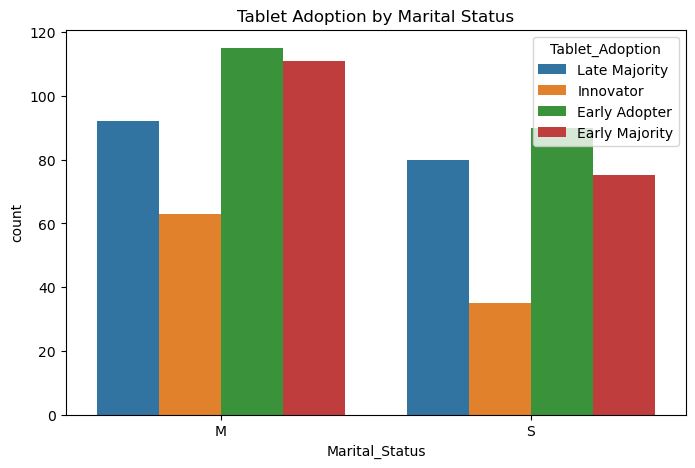

In [59]:
# Example visualization: Marital Status vs Tablet Adoption
plt.figure(figsize=(8, 5))
sns.countplot(data=tr, x="Marital_Status", hue="Tablet_Adoption")
plt.title("Tablet Adoption by Marital Status")
plt.show()

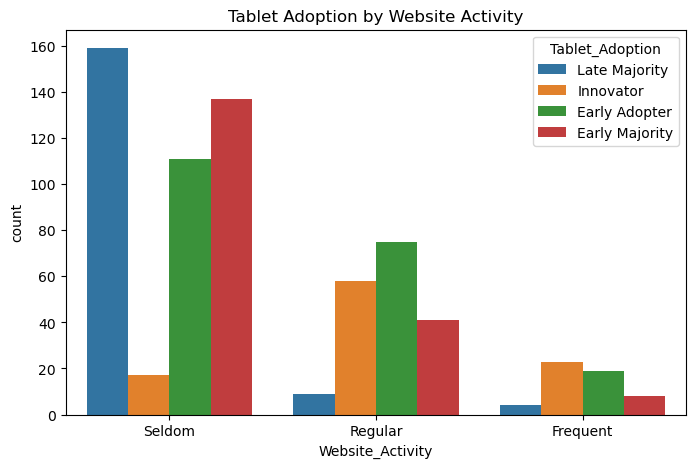

In [61]:
# Example visualization: Wesite Activity vs Tablet Adoption
plt.figure(figsize=(8, 5))
sns.countplot(data=tr, x="Website_Activity", hue="Tablet_Adoption")
plt.title("Tablet Adoption by Website Activity")
plt.show()

In [128]:
# Convert Categorical Variables to categorical
cat_columns = [
    'Gender', 'Marital_Status', 'Website_Activity',
    'Browsed_Electronics_12Mo', 'Bought_Electronics_12Mo',
    'Bought_Digital_Media_18Mo', 'Bought_Digital_Books',
    'Payment_Method'
]

for col in cat_columns:
    tr[col] = tr[col].astype('category')
    sc[col] = sc[col].astype('category')  # also convert scoring set
# Convert target to category
tr["Tablet_Adoption"] = tr["Tablet_Adoption"].astype('category')


In [132]:
# check dtypes
tr.info()
sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   User_ID                    661 non-null    int64   
 1   Gender                     661 non-null    category
 2   Age                        661 non-null    int64   
 3   Marital_Status             661 non-null    category
 4   Website_Activity           661 non-null    category
 5   Browsed_Electronics_12Mo   661 non-null    category
 6   Bought_Electronics_12Mo    661 non-null    category
 7   Bought_Digital_Media_18Mo  661 non-null    category
 8   Bought_Digital_Books       661 non-null    category
 9   Payment_Method             661 non-null    category
 10  Tablet_Adoption            661 non-null    category
dtypes: category(9), int64(2)
memory usage: 17.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 11 columns

In [71]:
# Prepare scoring set
X_score = sc.drop(columns=["User_ID"])



In [73]:
# Combine training and scoring sets to ensure consistent encoding
X_combined = pd.concat([X_train, X_score], axis=0)


In [75]:
# One-hot encode all categorical features together
X_combined_encoded = pd.get_dummies(X_combined)

In [77]:
# Split back into training and scoring sets
X_train_encoded = X_combined_encoded.iloc[:len(X_train), :]
X_score_encoded = X_combined_encoded.iloc[len(X_train):, :]

In [89]:
# Encode the target variable and save class labels
y_train_encoded = y_train.cat.codes
class_names = y_train.cat.categories

In [91]:
# Fit the model
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train_encoded, y_train_encoded)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [93]:
#Evaluate model on training data
y_pred_train = clf.predict(X_train_encoded)
cm = confusion_matrix(y_train_encoded, y_pred_train)
acc = accuracy_score(y_train_encoded, y_pred_train)
print("Training Accuracy:", round(acc, 3))

Training Accuracy: 0.666


In [100]:
# Create a labeled confusion matrix
cm_df = pd.DataFrame(
    cm, 
    index=[f"Actual: {label}" for label in class_names],
    columns=[f"Predicted: {label}" for label in class_names]
)

# Display it
print("Confusion Matrix with Class Labels:\n")
print(cm_df)

Confusion Matrix with Class Labels:

                        Predicted: Early Adopter  Predicted: Early Majority  \
Actual: Early Adopter                        132                         46   
Actual: Early Majority                        40                        117   
Actual: Innovator                             40                          1   
Actual: Late Majority                         11                         18   

                        Predicted: Innovator  Predicted: Late Majority  
Actual: Early Adopter                     16                        11  
Actual: Early Majority                     9                        20  
Actual: Innovator                         52                         5  
Actual: Late Majority                      4                       139  


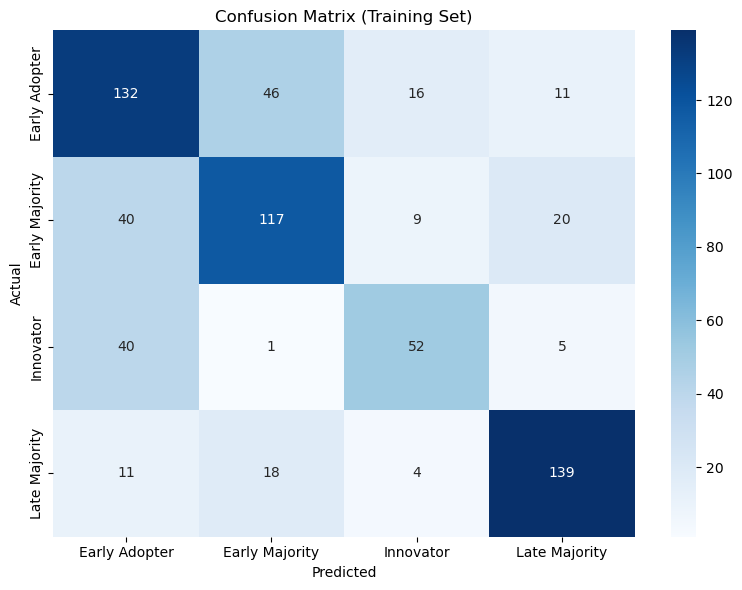

In [95]:
#plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels = class_names, yticklabels = class_names)
plt.title("Confusion Matrix (Training Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


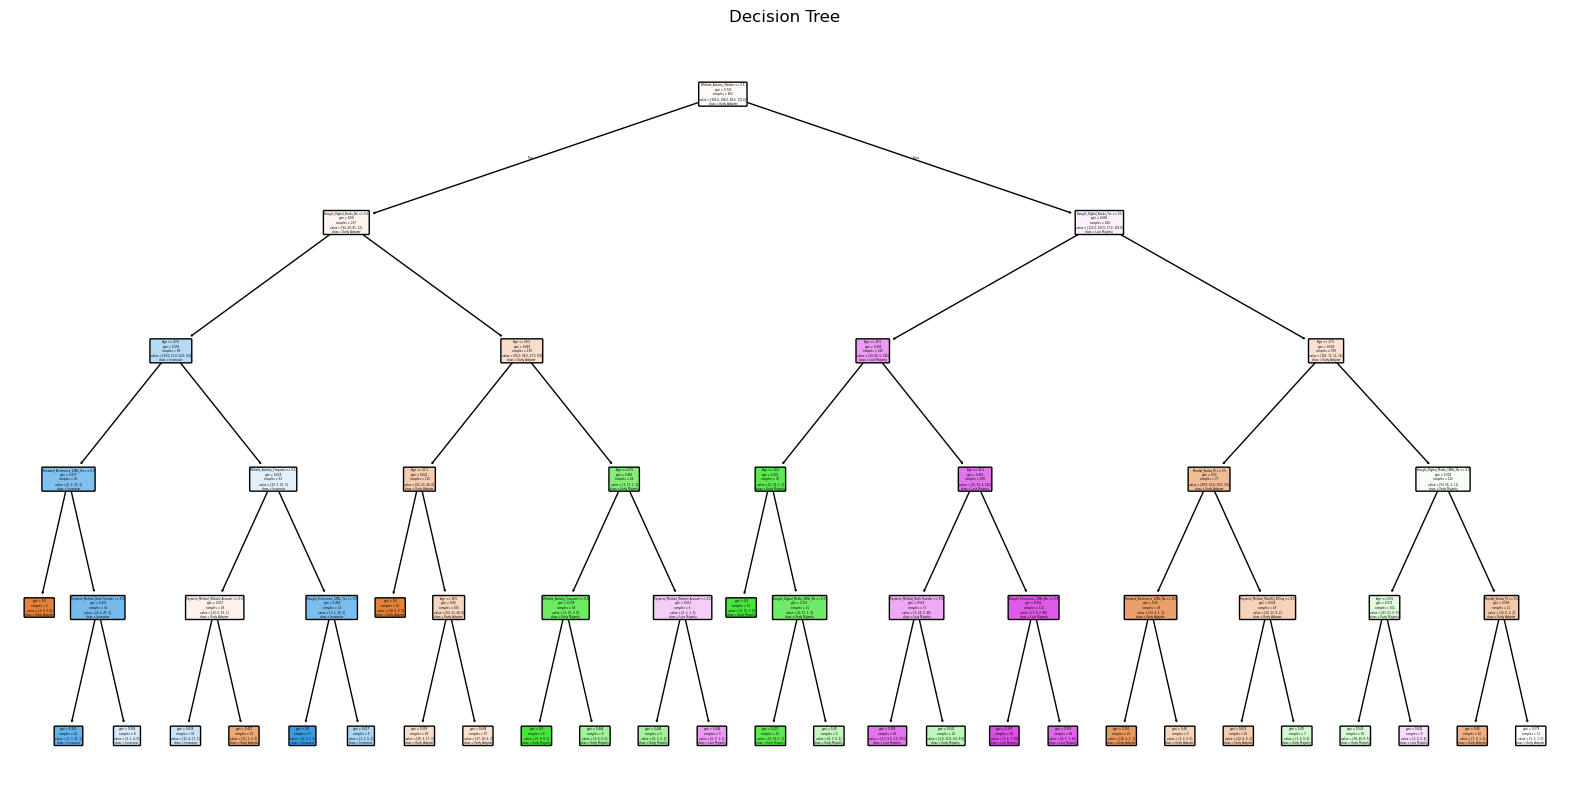

In [98]:
plt.figure(figsize=(20, 10))  # Adjust size as needed
plot_tree(
    clf,  # your trained model
    feature_names=X_train_encoded.columns,  # column names after encoding
    class_names=class_names,  # the original class labels
    filled=True,              # color the nodes
    rounded=True              # rounded boxes
)
plt.title("Decision Tree")
plt.show()

In [104]:
# Make predictions on the scoring dataset
score_predictions = clf.predict(X_score_encoded)

In [110]:
# define class names
class_names = y_train.cat.categories
print("Class labels:", class_names)


Class labels: Index(['Early Adopter', 'Early Majority', 'Innovator', 'Late Majority'], dtype='object')


In [112]:
import pandas as pd

predicted_labels = pd.Categorical.from_codes(score_predictions, categories=class_names)


In [114]:
#Attach scoring data
sc["Tablet_Adoption_Predicted"] = predicted_labels

# Preview results
print(sc[["User_ID", "Tablet_Adoption_Predicted"]].head())

   User_ID Tablet_Adoption_Predicted
0    56031                 Innovator
1    25913             Early Adopter
2    19396             Late Majority
3    93666                 Innovator
4    72282             Late Majority


In [116]:
# Count how many in each predicted class
pred_counts = sc["Tablet_Adoption_Predicted"].value_counts()

print("Predicted class distribution on scoring set:")
print(pred_counts)

Predicted class distribution on scoring set:
Tablet_Adoption_Predicted
Early Adopter     156
Late Majority     141
Early Majority    118
Innovator          58
Name: count, dtype: int64


C:\Users\mrc16\AppData\Local\Temp\ipykernel_29468\4127218509.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Tablet_Adoption_Predicted", data=sc,


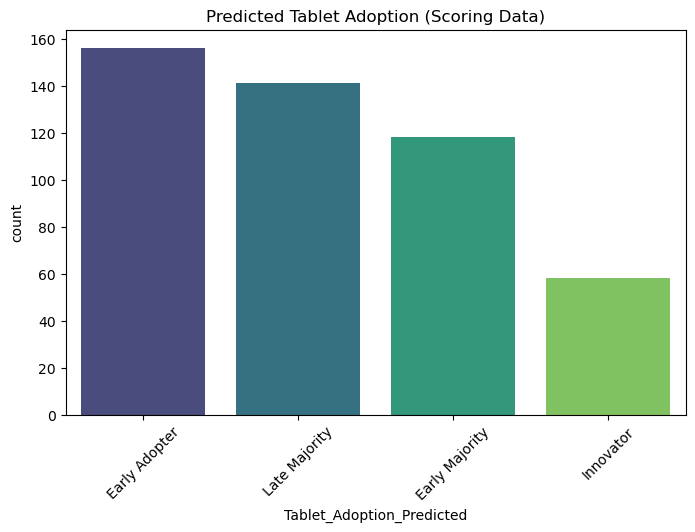

In [118]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Tablet_Adoption_Predicted", data=sc,
              order=pred_counts.index, palette="viridis")
plt.title("Predicted Tablet Adoption (Scoring Data)")
plt.xticks(rotation=45)
plt.show()

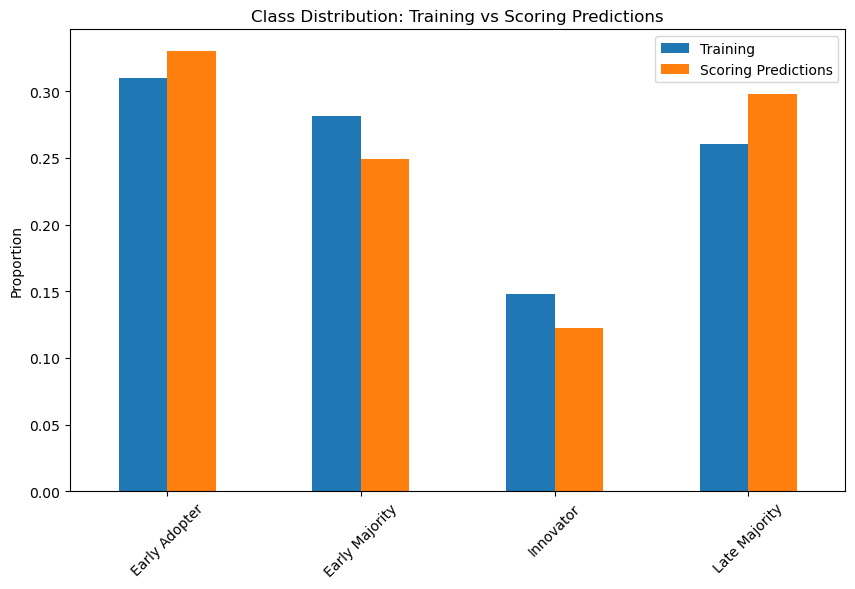

In [120]:
train_dist = y_train.value_counts(normalize=True)
score_dist = sc["Tablet_Adoption_Predicted"].value_counts(normalize=True)

compare_df = pd.DataFrame({
    "Training": train_dist,
    "Scoring Predictions": score_dist
}).fillna(0)

compare_df.plot(kind="bar", figsize=(10,6))
plt.title("Class Distribution: Training vs Scoring Predictions")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.show()

In [124]:
# Create a test/train split from the training dataset itself to measure how the model generalizes
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
tr = pd.read_csv("C:\\Users\\mrc16\\Downloads\\Chapter10DataSet_Training (1).csv")

In [134]:
# Convert Categorical Variables to categorical
cat_columns = [
    'Gender', 'Marital_Status', 'Website_Activity',
    'Browsed_Electronics_12Mo', 'Bought_Electronics_12Mo',
    'Bought_Digital_Media_18Mo', 'Bought_Digital_Books',
    'Payment_Method'
]

for col in cat_columns:
    tr[col] = tr[col].astype('category')
    sc[col] = sc[col].astype('category')  # also convert scoring set
# Convert target to category
tr["Tablet_Adoption"] = tr["Tablet_Adoption"].astype('category')

In [136]:
# check dtypes
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   User_ID                    661 non-null    int64   
 1   Gender                     661 non-null    category
 2   Age                        661 non-null    int64   
 3   Marital_Status             661 non-null    category
 4   Website_Activity           661 non-null    category
 5   Browsed_Electronics_12Mo   661 non-null    category
 6   Bought_Electronics_12Mo    661 non-null    category
 7   Bought_Digital_Media_18Mo  661 non-null    category
 8   Bought_Digital_Books       661 non-null    category
 9   Payment_Method             661 non-null    category
 10  Tablet_Adoption            661 non-null    category
dtypes: category(9), int64(2)
memory usage: 17.5 KB


In [138]:
# Prepare scoring set
X_score = sc.drop(columns=["User_ID"])

In [140]:
# Split training data into 70% train, 30% test
X = X_train_encoded
y = y_train_encoded

In [142]:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [146]:
print("Training subset size:", X_train_sub.shape[0])
print("Testing subset size:", X_test_sub.shape[0])

Training subset size: 462
Testing subset size: 199


In [148]:
# Train on the subset
clf_split = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_split.fit(X_train_sub, y_train_sub)

# Predictions
y_train_pred = clf_split.predict(X_train_sub)
y_test_pred = clf_split.predict(X_test_sub)

# Accuracy
print("Train Accuracy:", accuracy_score(y_train_sub, y_train_pred))
print("Test Accuracy :", accuracy_score(y_test_sub, y_test_pred))

# Confusion matrix for test set
cm_test = confusion_matrix(y_test_sub, y_test_pred)
print("\nConfusion Matrix (Test Set):\n", cm_test)

# Detailed classification report
print("\nClassification Report (Test Set):\n")
print(classification_report(y_test_sub, y_test_pred, target_names=class_names))


Train Accuracy: 0.683982683982684
Test Accuracy : 0.5628140703517588

Confusion Matrix (Test Set):
 [[27 22 10  3]
 [13 31  2 10]
 [10  1 17  1]
 [ 3 10  2 37]]

Classification Report (Test Set):

                precision    recall  f1-score   support

 Early Adopter       0.51      0.44      0.47        62
Early Majority       0.48      0.55      0.52        56
     Innovator       0.55      0.59      0.57        29
 Late Majority       0.73      0.71      0.72        52

      accuracy                           0.56       199
     macro avg       0.57      0.57      0.57       199
  weighted avg       0.56      0.56      0.56       199



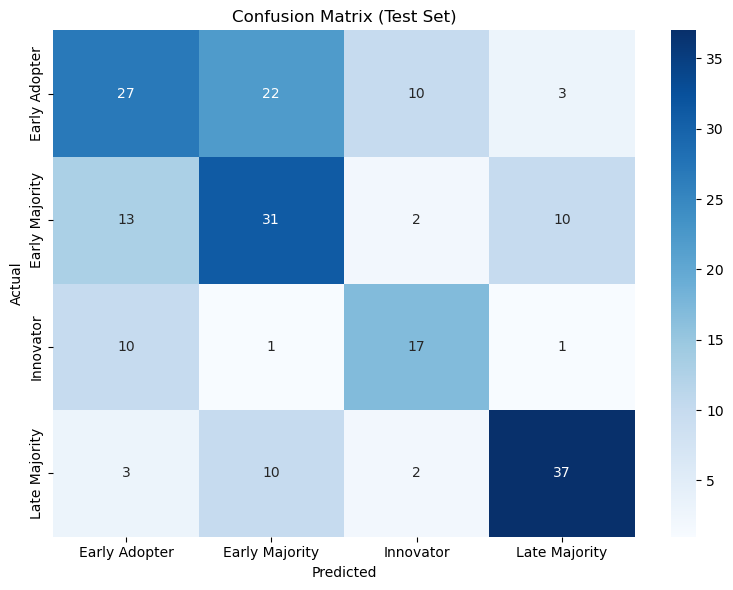

In [150]:
# visualize the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


C:\Users\mrc16\AppData\Local\Temp\ipykernel_29468\1238473189.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette="viridis")


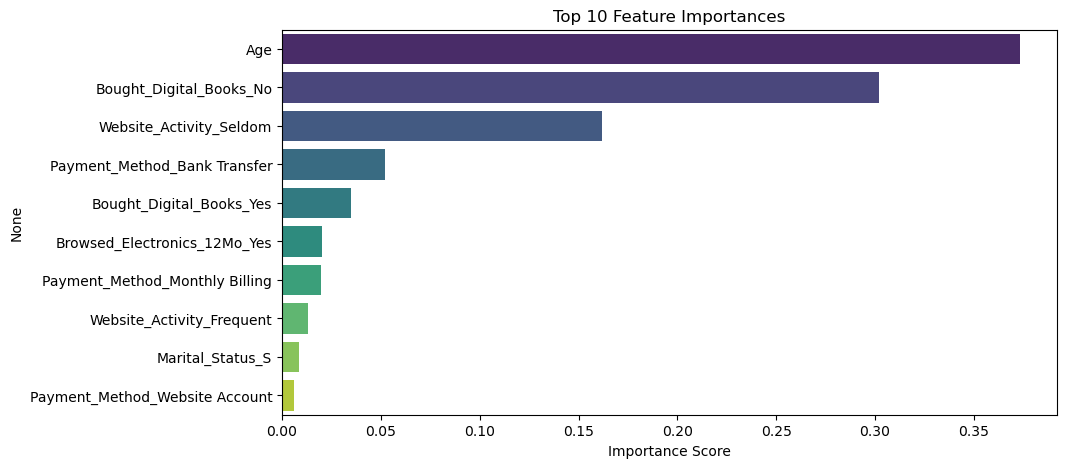

In [152]:
importances = pd.Series(clf_split.feature_importances_, index=X_train_encoded.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_features, y=top_features.index, palette="viridis")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()